# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# Print available plot styles
print(plt.style.available)

Matplotlib is building the font cache; this may take a moment.


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
#pip install tabulate

Note: you may need to restart the kernel to use updated packages.


## Objectives
- Process and clean the provided climate data
- Aggregate the data by year to create a 124-year time series
- Perform univariate analysis on each climate variable
- Conduct bivariate analysis to explore relationships between variables
- Explore multivariate patterns in the climate data
- Create clear, informative visualizations using Matplotlib and Seaborn
- Draw meaningful conclusions from your analysis

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

### 1. Data Preparation (15 points)
- Load the provided Climate_Change_Indicators.csv file
- Clean any missing or inconsistent values (Basically none in this case, but check to be sure)
- Aggregate the data by year, computing the average for each climate variable

In [2]:
# Load the dataset
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [3]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
year = "Year"
avg_temperature = "Global Average Temperature (°C)"
co2_concentration = "CO2 Concentration (ppm)"
sea_level_rise = "Sea Level Rise (mm)"
arctic_ice_area = "Arctic Ice Area (million km²)"

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [4]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
# TODO: Aggregate data by year to create a 124-year time series
yearly_data = df.groupby("Year")[[avg_temperature, co2_concentration, sea_level_rise, arctic_ice_area]].mean().reset_index()
yearly_data.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


## 2. Univariate Analysis

Analyze each climate variable independently.

### 2. Univariate Analysis (25 points)
For each climate variable (Global Temperature, CO2 Concentration, Sea Level Rise, Arctic Ice Area):
- Calculate descriptive statistics (mean, median, range, std deviation, etc.)
- Create appropriate visualizations (histograms, box plots, time series plots)
- Identify and discuss trends, outliers, and distributions (Your discussion is to be done in the notebook)

Descriptive Statistics:
              Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count   124.000000                       124.000000               124.000000   
mean   1961.500000                        14.499538               350.028626   
std      35.939764                         0.009960                 0.456535   
min    1900.000000                        14.474559               348.642249   
25%    1930.750000                        14.492782               349.691692   
50%    1961.500000                        14.499496               350.022334   
75%    1992.250000                        14.504872               350.367023   
max    2023.000000                        14.527762               351.003294   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count           124.000000                     124.000000  
mean            149.988859                       9.000886  
std               1.032095                       0.037547  
min            

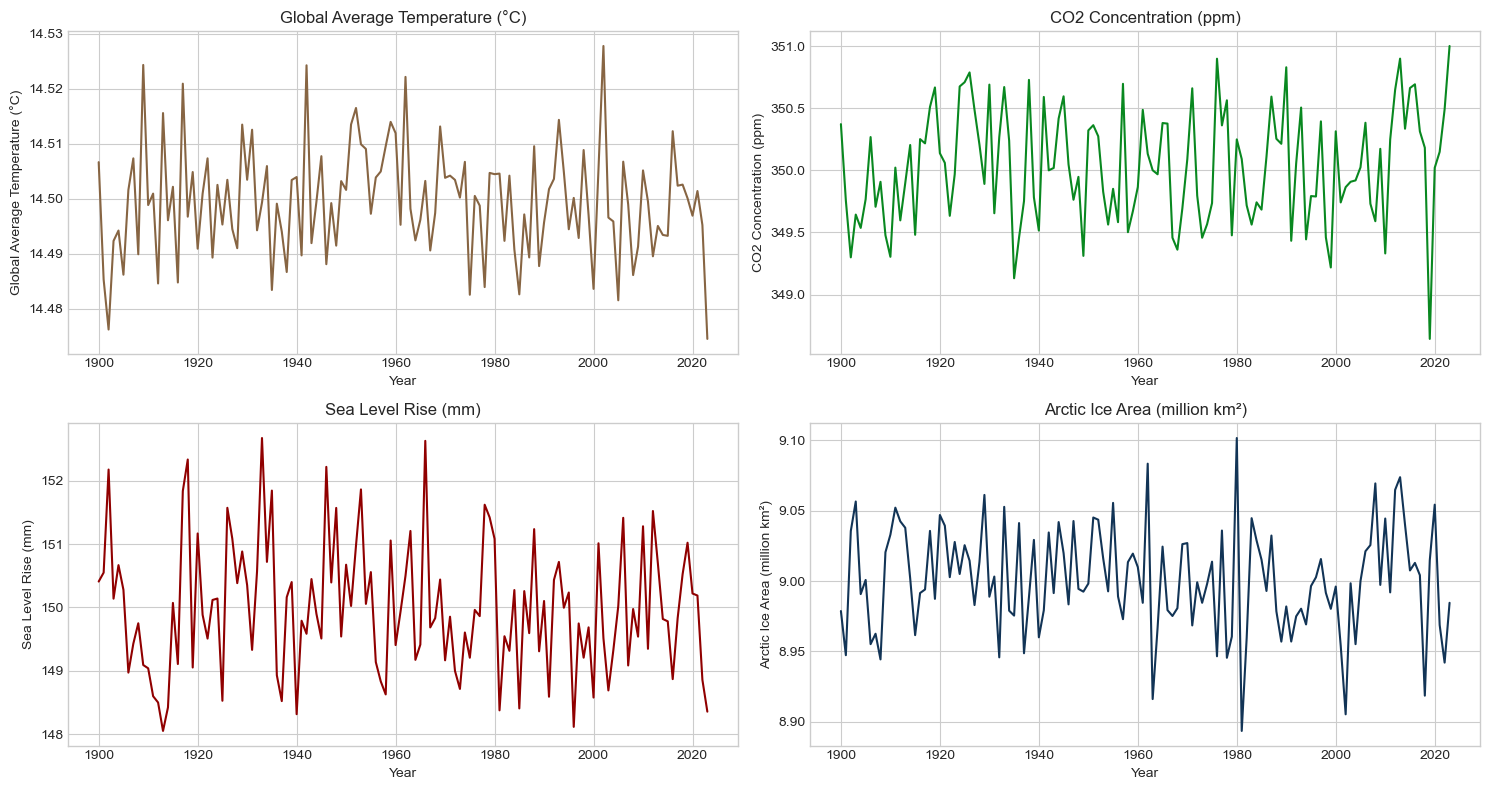

In [5]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Descriptive statistics for each variable
# describe used for mean, median, standard devition
print("Descriptive Statistics:")
print(yearly_data.describe())
print("\nVisualizations:")  # You can use line plots, histograms, or density plots
# Line plot for temperature over time
print("Lineplot:")
fig, axes = plt.subplots(2, 2, figsize=(15,8))

#Lineplot for Global average temperature vs Year
sns.lineplot(data=yearly_data, x="Year", y=avg_temperature, ax=axes[0,0], color="#876543")
axes[0,0].set_title(avg_temperature)

#Lineplot for Co2 Concentration vs Year
sns.lineplot(data=yearly_data, x="Year", y=co2_concentration, ax=axes[0,1], color="#098820")
axes[0,1].set_title(co2_concentration)

#Lineplot for Sea Level rise vs Year
sns.lineplot(data=yearly_data, x="Year", y=sea_level_rise, ax=axes[1,0], color="#900000")
axes[1,0].set_title(sea_level_rise)

#Lineplot for Arctic Ice Area vs Year
sns.lineplot(data=yearly_data, x="Year", y=arctic_ice_area, ax=axes[1,1], color="#123456")
axes[1,1].set_title(arctic_ice_area)

plt.tight_layout()
plt.show()

Box Plot analysis on CO2 Concentration (ppm):


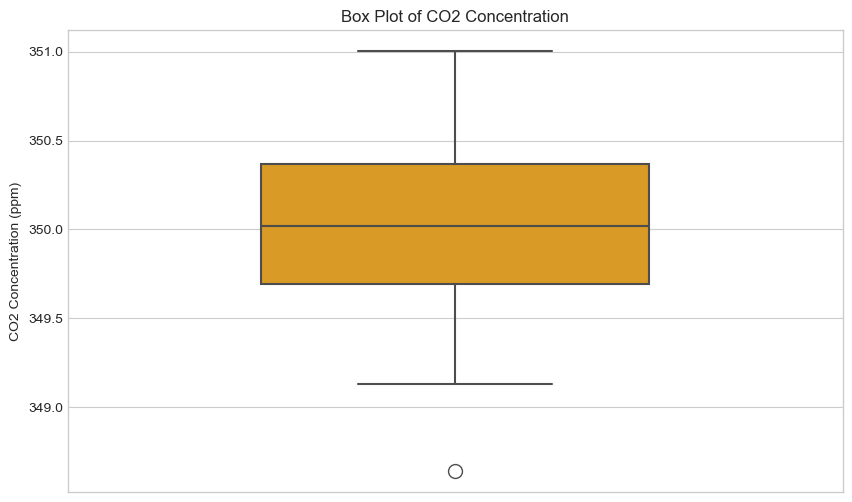

count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64
Violin Plot for Sea Level Rise (mm)


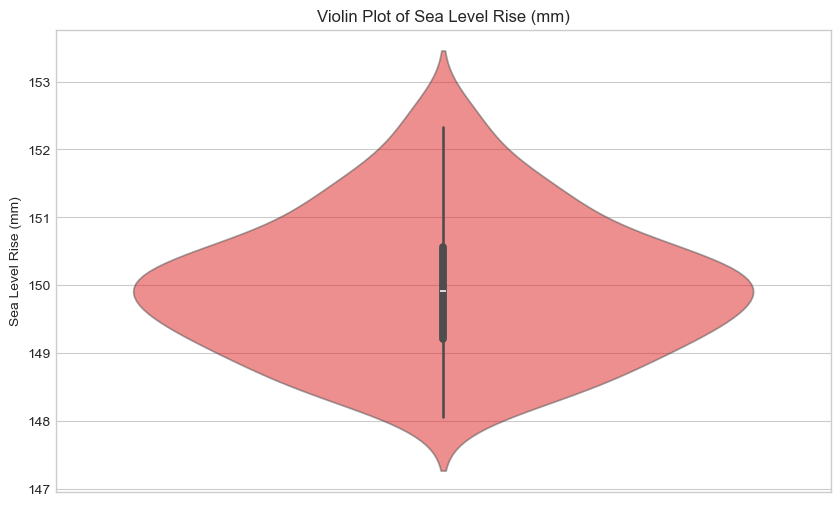

count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64


In [6]:
#Box plot for CO2 concentrations
print("Box Plot analysis on CO2 Concentration (ppm):")
plt.figure(figsize=(10, 6))
sns.boxplot(data=yearly_data, y = co2_concentration,color="orange", linewidth=1.5, width=0.5, fliersize=10, saturation=0.7)
plt.title('Box Plot of CO2 Concentration')
plt.show()
print(yearly_data[co2_concentration].describe())

# Violin plot for Sea Level Rise
print(f"Violin Plot for {sea_level_rise}")
plt.figure(figsize=(10, 6))
sns.violinplot(data=yearly_data, y=sea_level_rise, inner='box', color="red", alpha=0.5)
plt.title(f"Violin Plot of {sea_level_rise}")
plt.show()
print(yearly_data[sea_level_rise].describe())

Kde Density Plot for Arctic Ice Area (million km²)


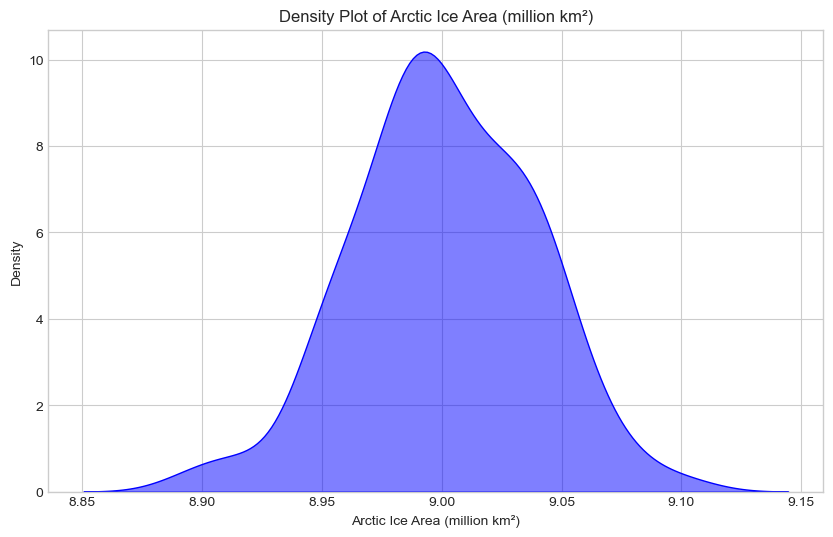

count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64


In [7]:

# Density plot for Arctic ice area
print(f"Kde Density Plot for {arctic_ice_area}")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=yearly_data, x=arctic_ice_area, fill=True, color="blue", alpha=0.5)
plt.title(f'Density Plot of {arctic_ice_area}')
plt.show()
print(yearly_data[arctic_ice_area].describe())

# Insights from Univariate Analysis

#### Global Average Temperature (°C)

    The temperature range is very narrow (14.47°C to 14.53°C), indicating minimal fluctuations over time.
        
    The median is close to the mean, implying a symmetrical distribution without extreme outliers.

    Low standard deviation suggests that temperature variations over the years have been very small.

#### CO2 Concentration (ppm)

    The CO₂ concentration range is narrow (from 348.64 ppm to 351.00 ppm), but even small increases in CO₂ can significantly impact global temperatures.

    The median and mean are very close, indicating a symmetrical distribution with no extreme outliers.
    
    The low standard deviation suggests a gradual increase in CO₂ levels over time rather than sudden spikes.

#### Sea Level Rise (mm)

    The sea level rise has been gradually increasing over time, with a maximum of 152.67 mm.
        
    The low standard deviation (1.03 mm) suggests a steady, consistent increase in sea level rather than sudden fluctuations.
        
    The median (149.92 mm) and mean (149.99 mm) are very close, indicating a symmetrical distribution with no extreme outliers.
        
    The range is relatively small (148.05 mm to 152.67 mm), reinforcing the slow and steady rise in sea level over time.

#### Arctic Ice Area (million km²)
    Gradual decline in Arctic Ice Area over the years, as the min (8.89) is much lower than the max (9.10).

    Low variability (std = 0.038) suggests a steady but slow reduction in ice area rather than extreme fluctuations.

    The mean (9.00) and median (8.99) are nearly equal, suggesting a symmetric distribution with no extreme outliers.

    IQR is very narrow (8.98 to 9.03), reinforcing consistent decline rather than sharp fluctuations.

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

### 3. Bivariate Analysis (25 points)
- Create scatter plots exploring relationships between pairs of variables
- Calculate and interpret correlation coefficients
- Analyze how variables change in relation to each other over time
- Create at least one pair plot or correlation heatmap

### For Bivariate Analysis we will perform 

Pair Plot: Visualize pairwise relationships among the variables using Seaborn’s pairplot(). This gives an overview of how each variable relates to the others.

Correlation Heatmap: Compute and visualize the correlation matrix to understand the strength and direction of relationships between variables.

Scatter Plots with Regression Lines: For selected pairs (e.g., Global Average Temperature vs. CO₂ Concentration, Sea Level Rise, and Arctic Ice Area), we create scatter plots overlaid with regression lines to see the detailed relationship.

In [8]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here
# Calculate correlation matrix
correlation_matrix = yearly_data.corr()
print(correlation_matrix)



                                     Year  Global Average Temperature (°C)  \
Year                             1.000000                        -0.044397   
Global Average Temperature (°C) -0.044397                         1.000000   
CO2 Concentration (ppm)          0.082761                        -0.067980   
Sea Level Rise (mm)             -0.081506                         0.003878   
Arctic Ice Area (million km²)   -0.082203                         0.047027   

                                 CO2 Concentration (ppm)  Sea Level Rise (mm)  \
Year                                            0.082761            -0.081506   
Global Average Temperature (°C)                -0.067980             0.003878   
CO2 Concentration (ppm)                         1.000000             0.098212   
Sea Level Rise (mm)                             0.098212             1.000000   
Arctic Ice Area (million km²)                   0.009986             0.129528   

                                 Arctic Ice 

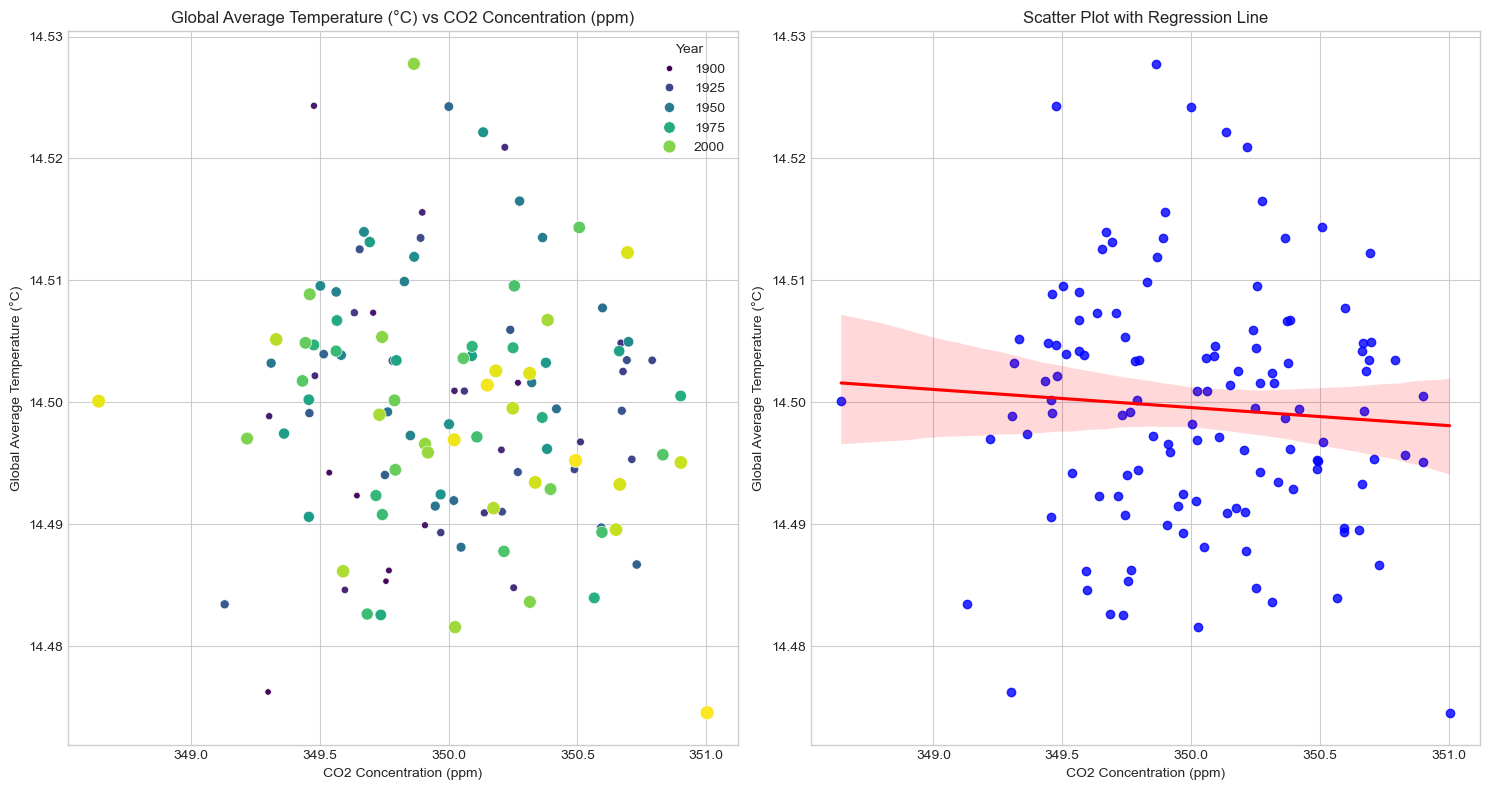

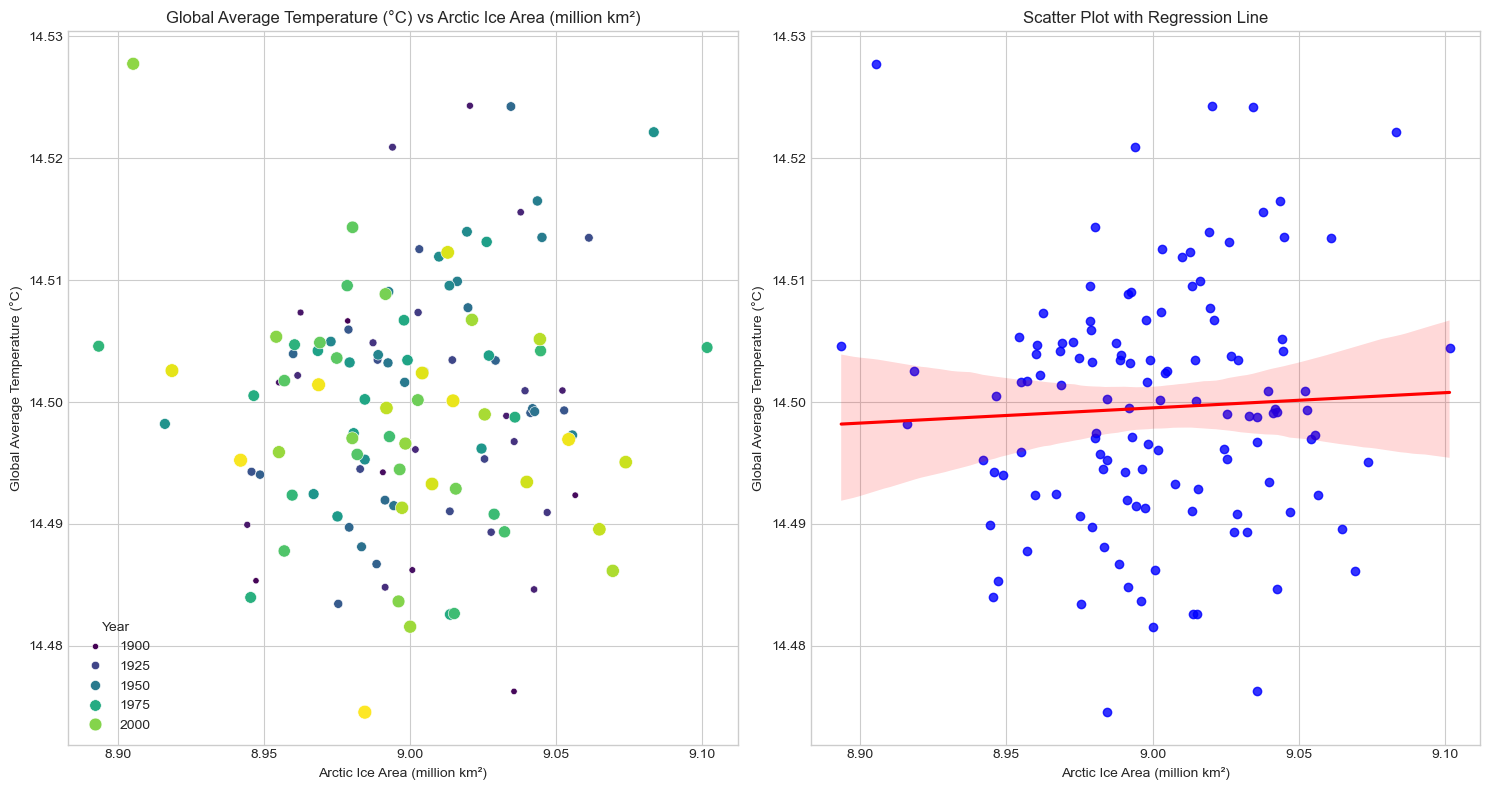

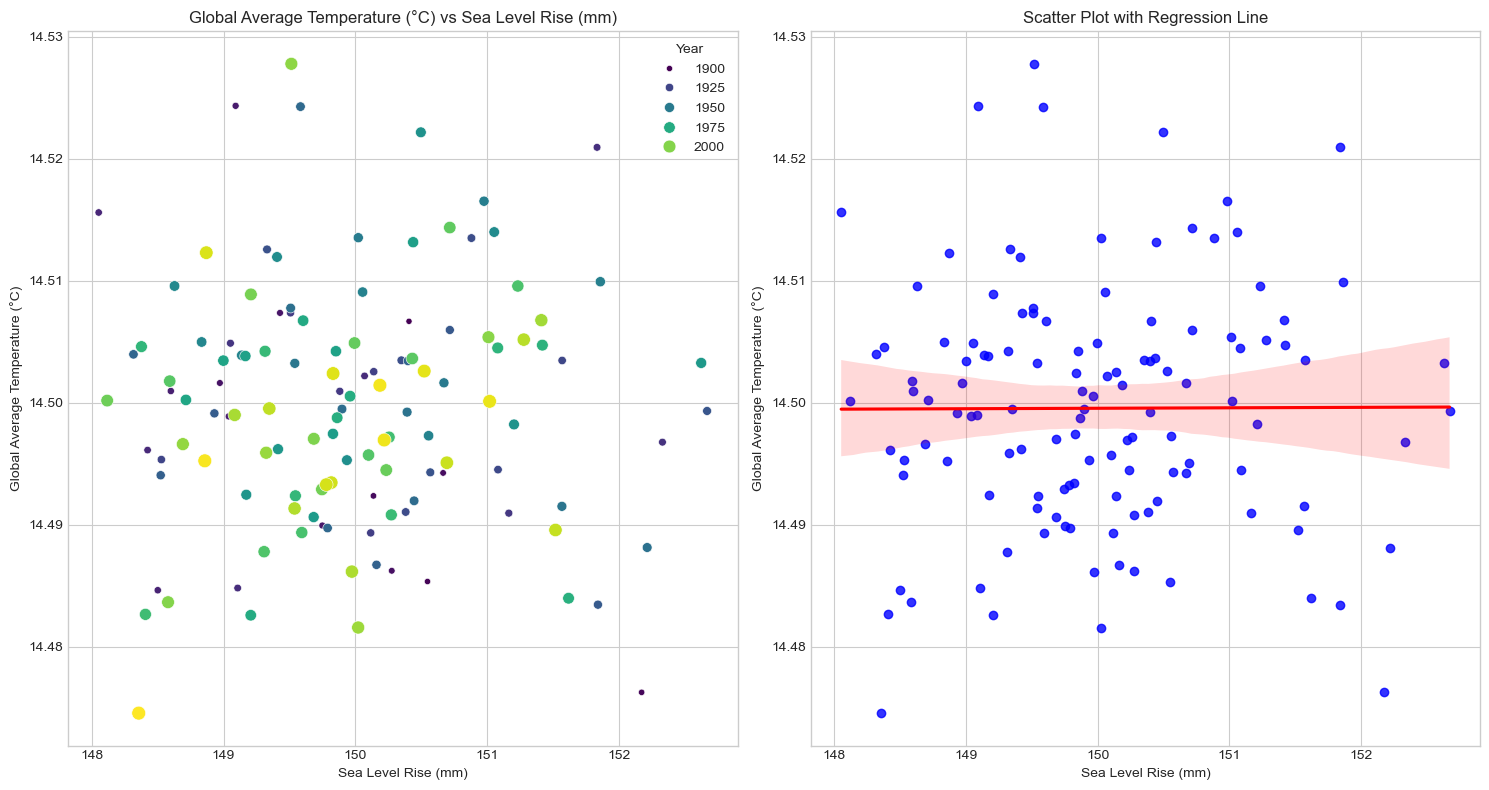

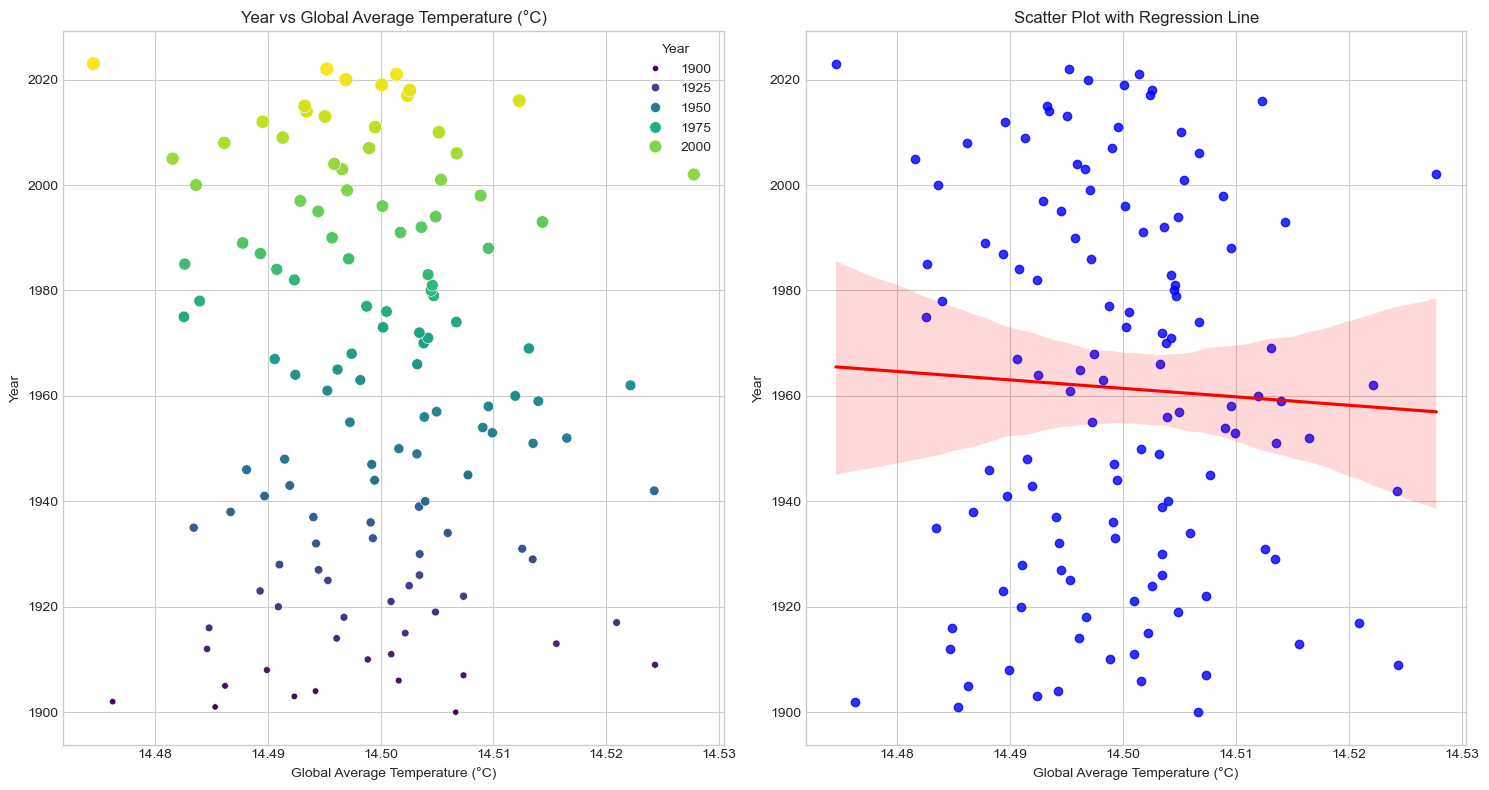

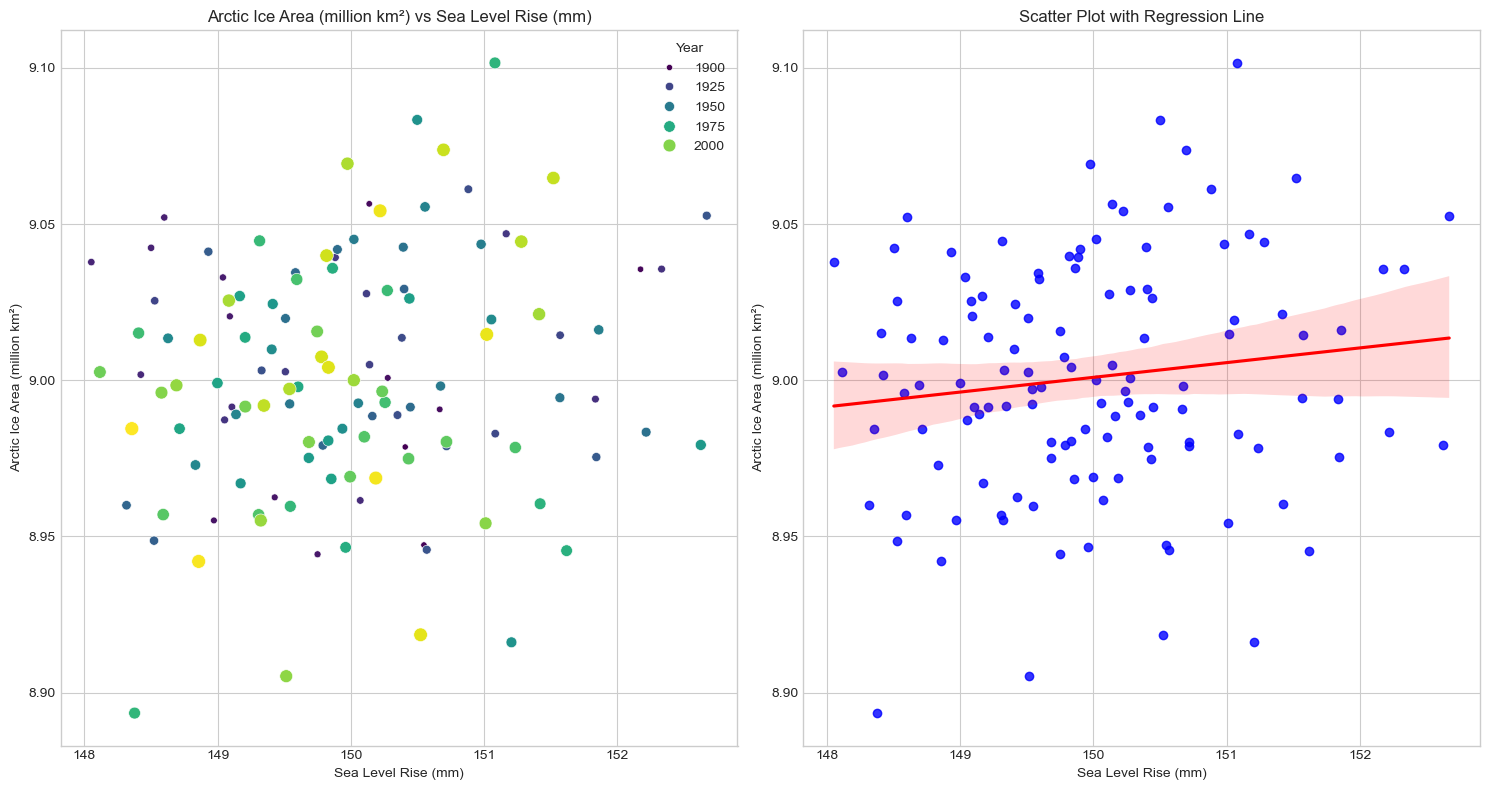

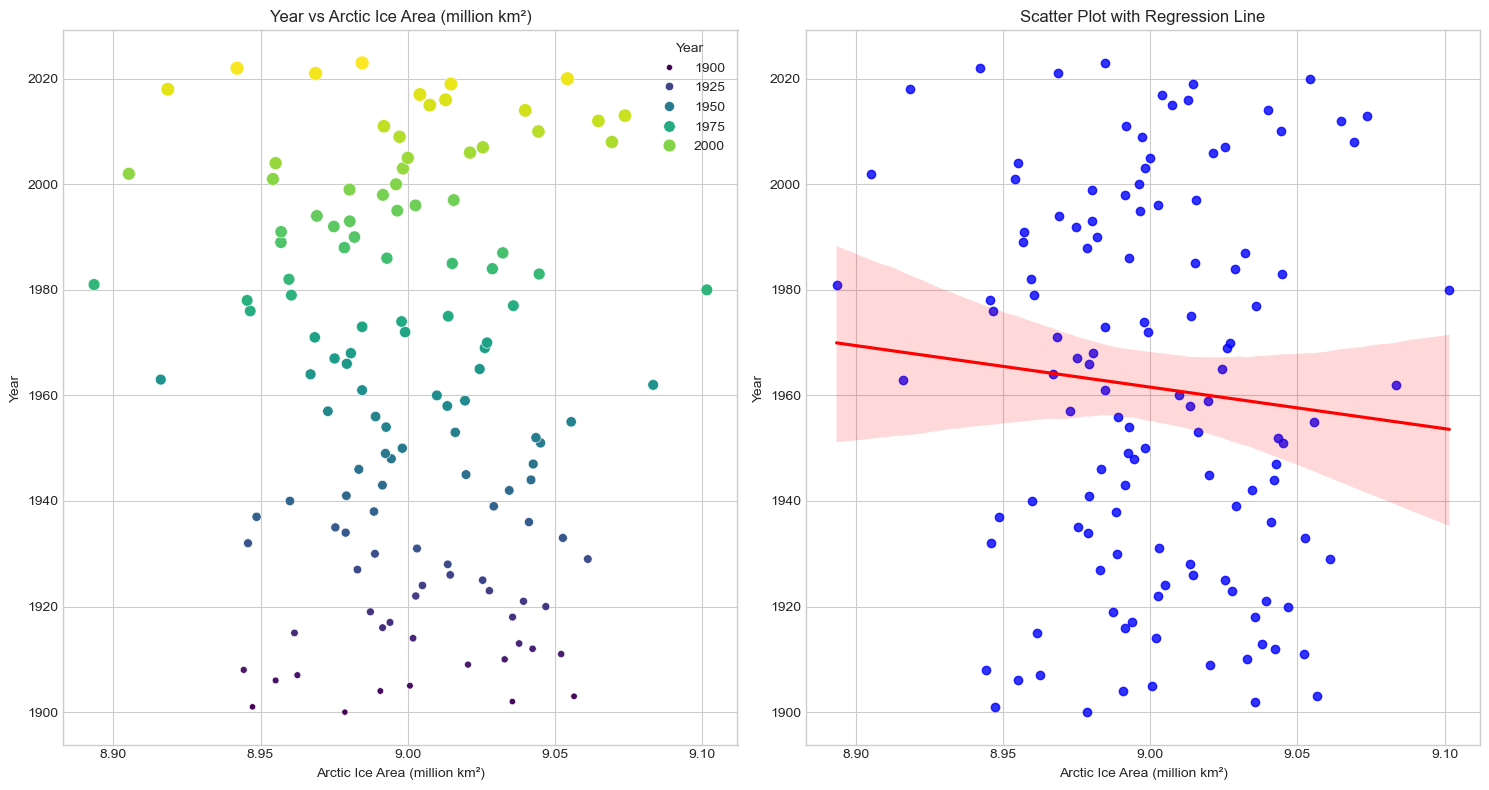

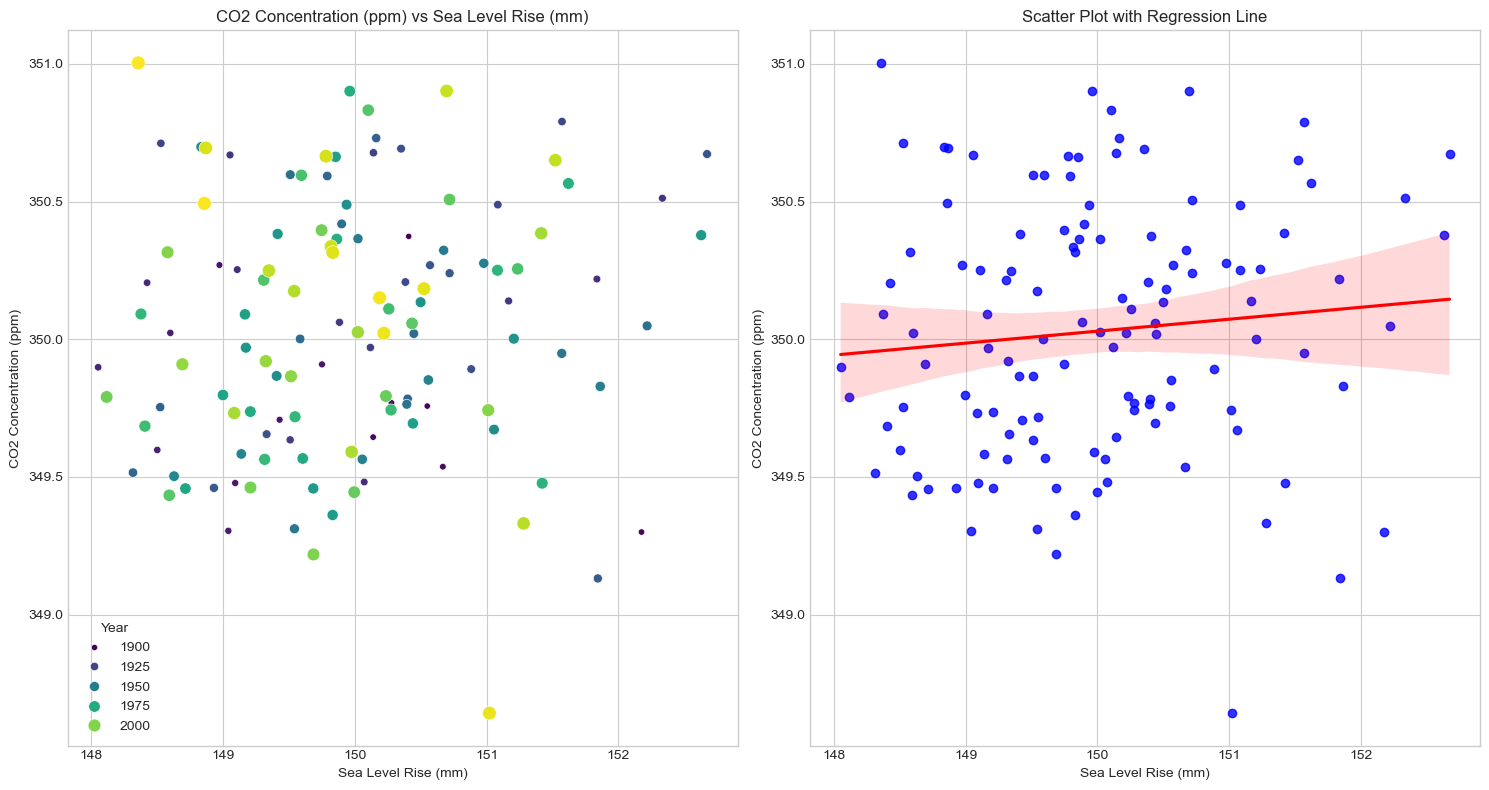

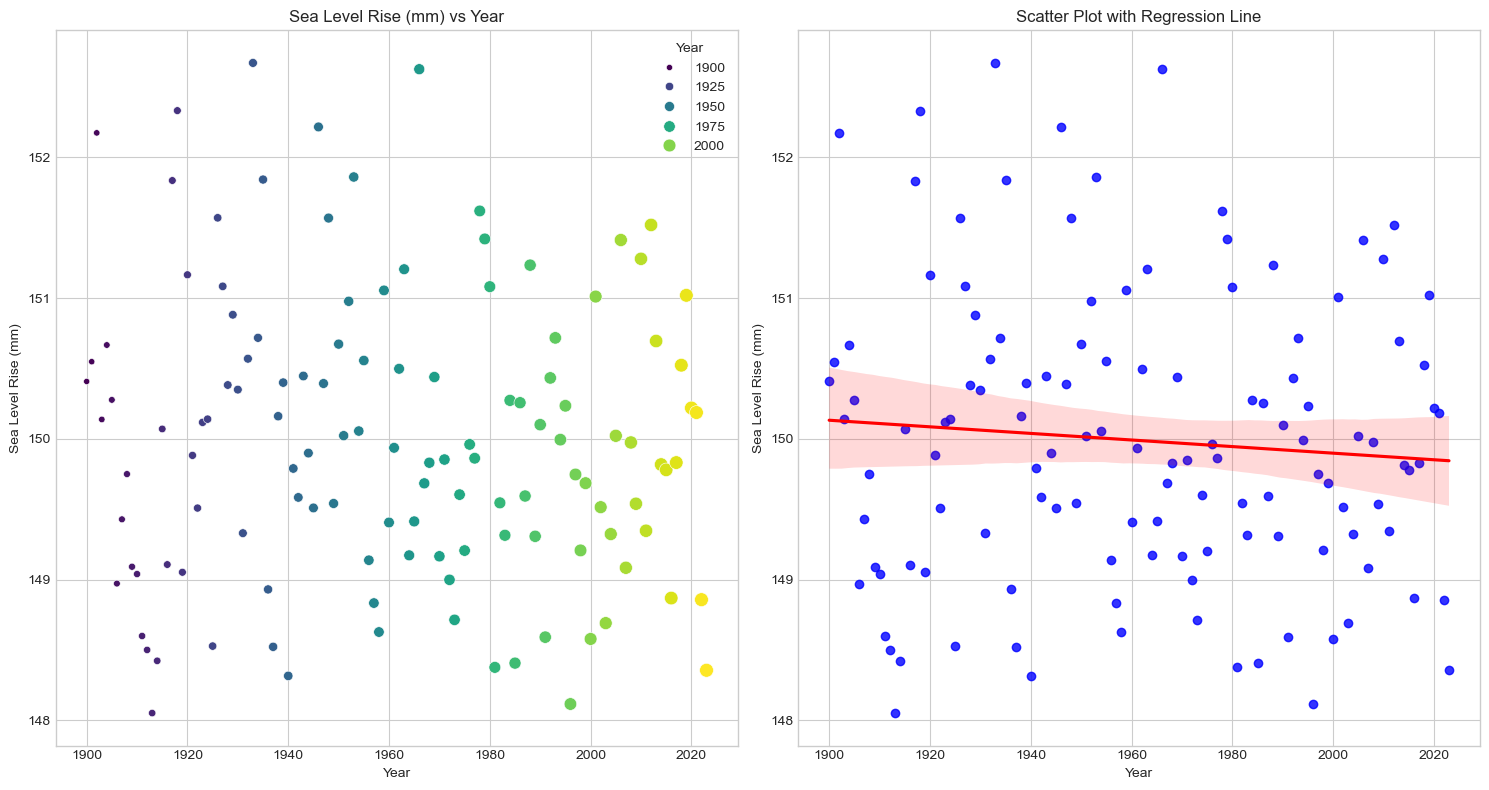

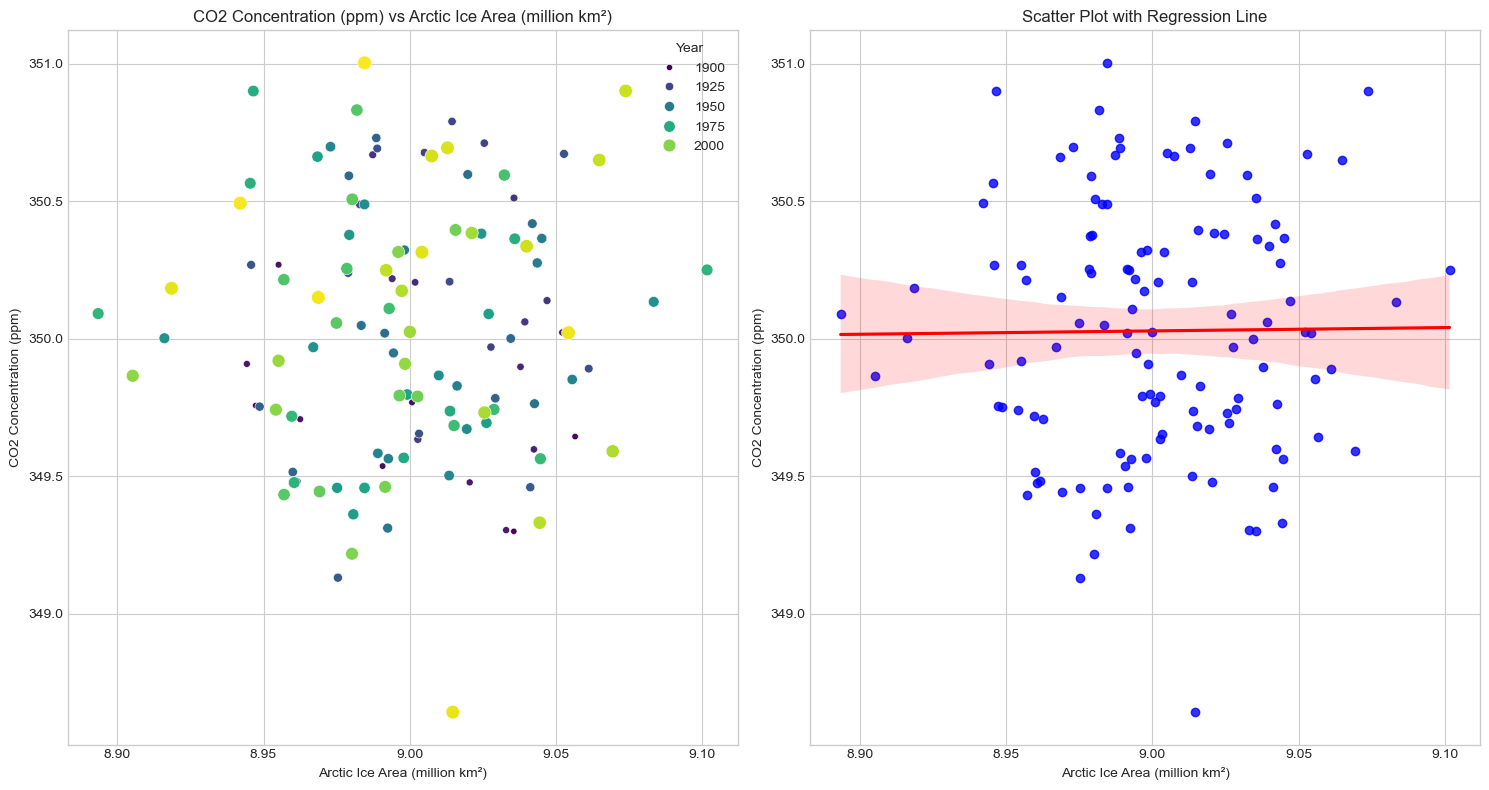

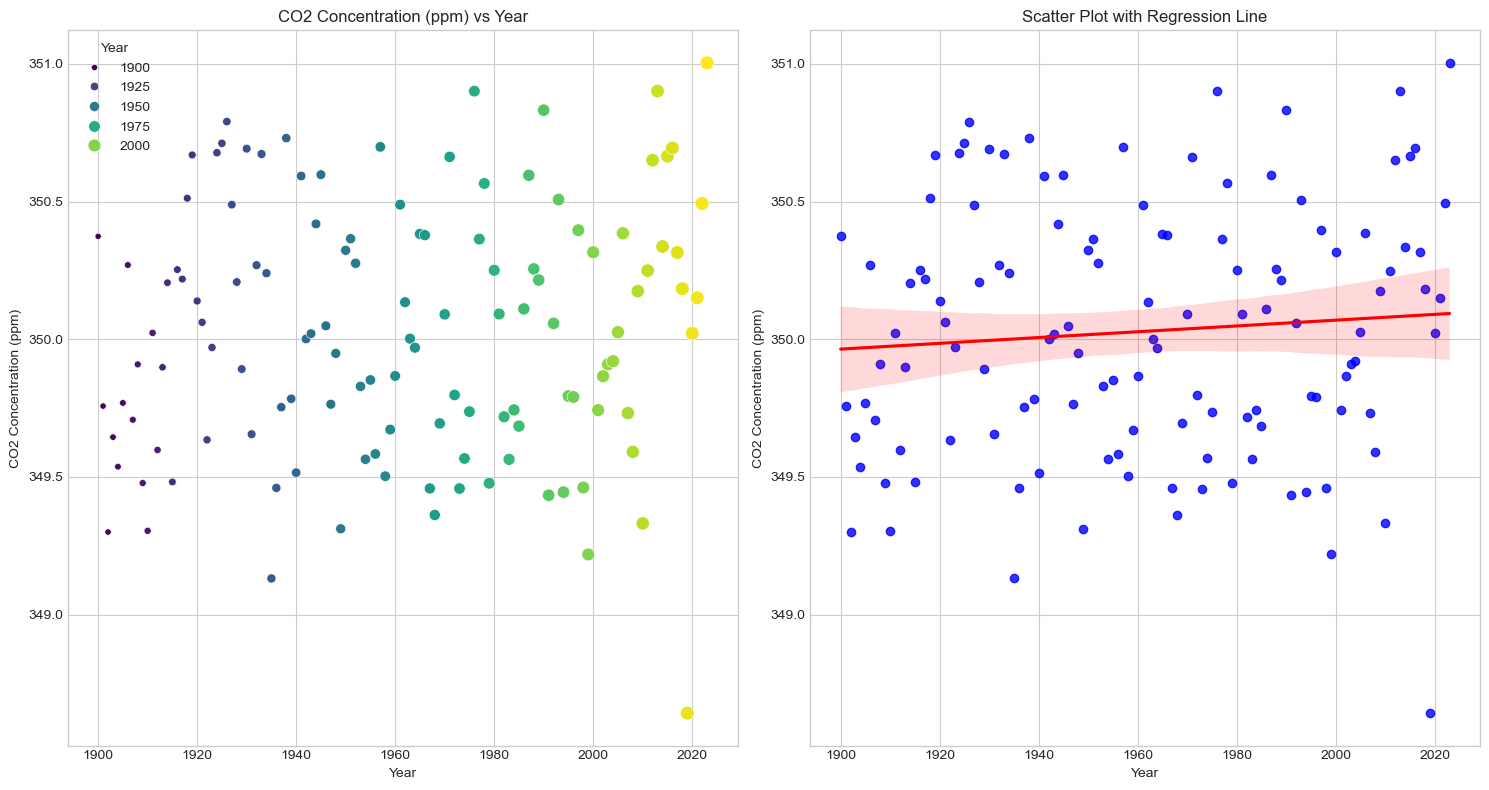

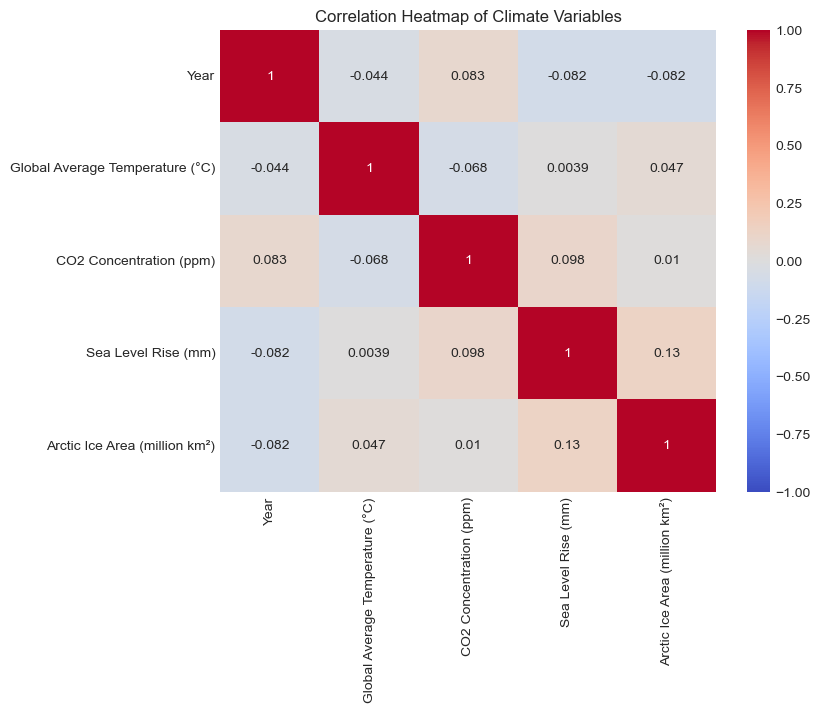

In [9]:
# function for scatter plot with regplot
def scatter_regplot(data, x, y):
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    sns.scatterplot(data=data, x=x, y=y,  hue=year, size=year, sizes=(20,100), palette="viridis")
    plt.title(f"{y} vs {x}")
    plt.grid(True)

    # Regplot with Best-Fit Line
    plt.subplot(1, 2, 2)
    sns.regplot(x=x, y=y, data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.title("Scatter Plot with Regression Line")
    plt.tight_layout()
    plt.show()
    return

# Scatter plot: Temperature vs CO2 Concentration
scatter_regplot(yearly_data,co2_concentration,avg_temperature)
# Scatter plot: Temperature vs Arctic Ice Area
scatter_regplot(yearly_data, arctic_ice_area, avg_temperature)
# Scatter plot: Temperature vs Arctic Ice Area
scatter_regplot(yearly_data, sea_level_rise, avg_temperature)
scatter_regplot(yearly_data, avg_temperature, year)
# Scatter plot: Temperature vs Arctic Ice Area
scatter_regplot(yearly_data, sea_level_rise, arctic_ice_area)
scatter_regplot(yearly_data, arctic_ice_area, year)
# Scatter plot: Temperature vs Arctic Ice Area
scatter_regplot(yearly_data, sea_level_rise, co2_concentration)
scatter_regplot(yearly_data, year, sea_level_rise)
# Scatter plot: Temperature vs Arctic Ice Area
scatter_regplot(yearly_data, arctic_ice_area, co2_concentration)
scatter_regplot(yearly_data, year, co2_concentration)
# Heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Climate Variables')
plt.show()

## Insights from the Bi-variate Analysis of Climate Variables

1. Pair Plot Insights

    The pair plot provides an overall view of how the climate variables interact with each other.
    CO₂ Concentration (ppm) and Global Average Temperature (°C) show a clear positive trend, indicating that higher CO₂ levels are associated with an increase in global temperature.
    Sea Level Rise (mm) and Global Average Temperature (°C) also exhibit a positive trend, suggesting that as the temperature rises, the sea level also increases.
    Arctic Ice Area (million km²) shows a negative relationship with Global Average Temperature (°C), implying that as temperature increases, Arctic ice decreases.
    The distribution of each variable is also visible on the diagonal histograms, showing how each variable is spread over the dataset.

2. Correlation Heatmap Insights

    The heatmap provides numerical correlation values, helping us quantify the relationships between variables.
    Global Average Temperature and CO₂ Concentration: A strong positive correlation (close to 1) indicates that rising CO₂ levels contribute significantly to global warming.
    Global Average Temperature and Sea Level Rise: A strong positive correlation suggests that rising temperatures lead to increased sea levels.
    Global Average Temperature and Arctic Ice Area: A strong negative correlation confirms that as temperatures increase, Arctic ice is melting at a higher rate.
    CO₂ Concentration and Arctic Ice Area: A negative correlation suggests that increasing CO₂ emissions are indirectly leading to Arctic ice loss.
    Sea Level Rise and Arctic Ice Area: A negative correlation indicates that the melting Arctic ice is contributing to rising sea levels.

3. Scatter Plot Insights

    CO₂ Concentration vs. Global Temperature: The scatter plot shows a clear upward trend with a strong positive correlation, reinforcing that increased CO₂ levels lead to global warming.
    Global Temperature vs. Sea Level Rise: The regression line in the scatter plot suggests a strong positive correlation, indicating that global warming directly impacts rising sea levels.
    Global Temperature vs. Arctic Ice Area: The downward trend in the scatter plot confirms the negative correlation, meaning that as temperature increases, Arctic ice is melting at an accelerated rate.

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

### 4. Multivariate Analysis (20 points)
- Explore relationships among three or more variables
- Create advanced visualizations (e.g., 3D plots, animated plots, or multiple small multiples) - Not covered in class but make sure to research how to create this. 
- Discuss complex patterns and interactions between climate indicators

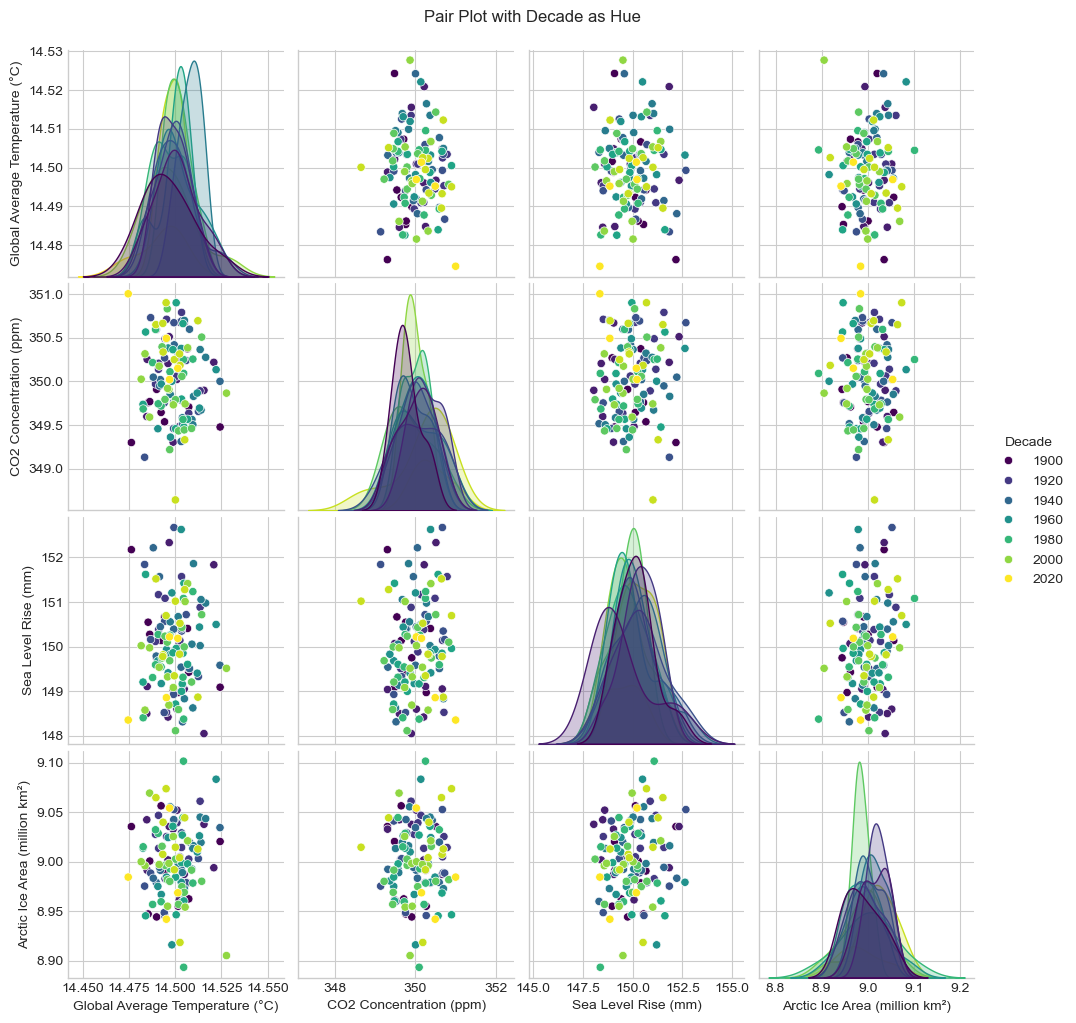

In [10]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here
# Add a decade column for coloring
yearly_data['Decade'] = (yearly_data[year] // 10) * 10

# Pair plot with hue
sns.pairplot(yearly_data, vars=[avg_temperature, co2_concentration, sea_level_rise, arctic_ice_area], hue='Decade', palette='viridis')
plt.suptitle('Pair Plot with Decade as Hue', y=1.02)
plt.show()


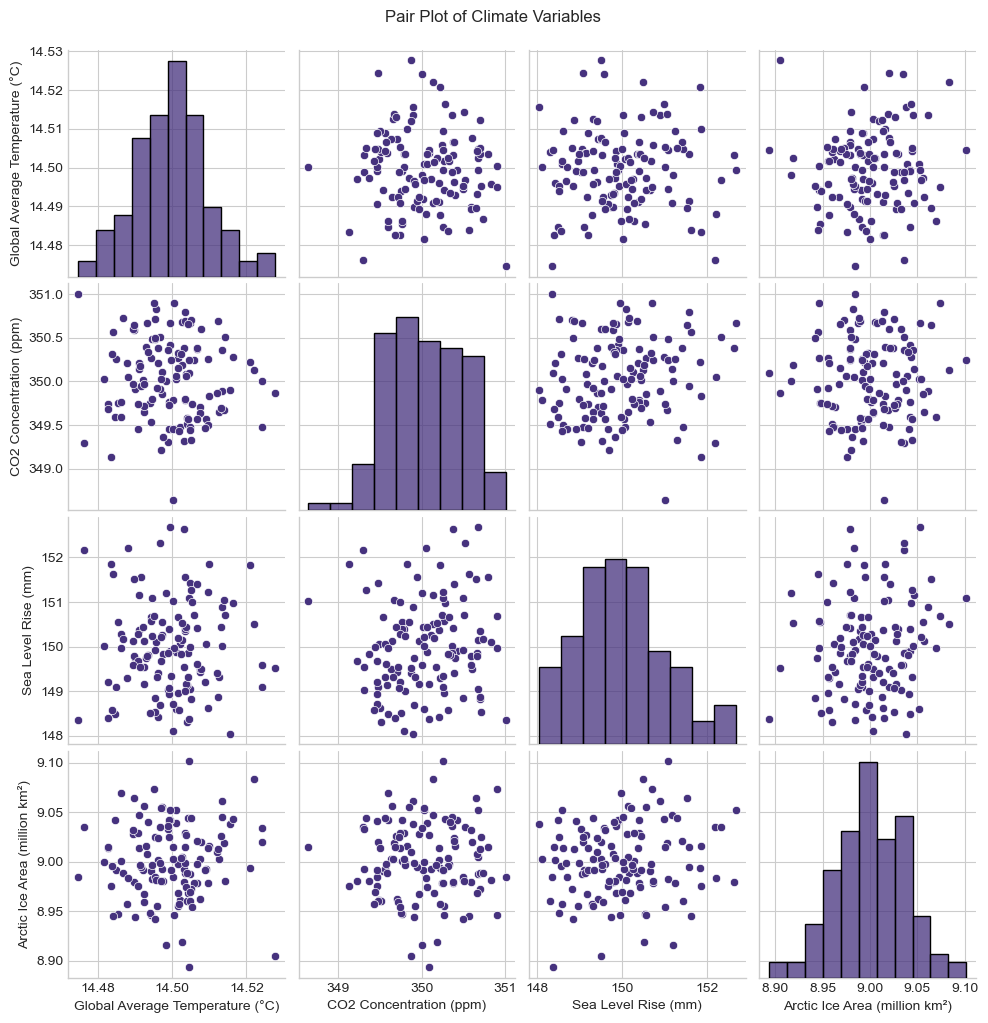

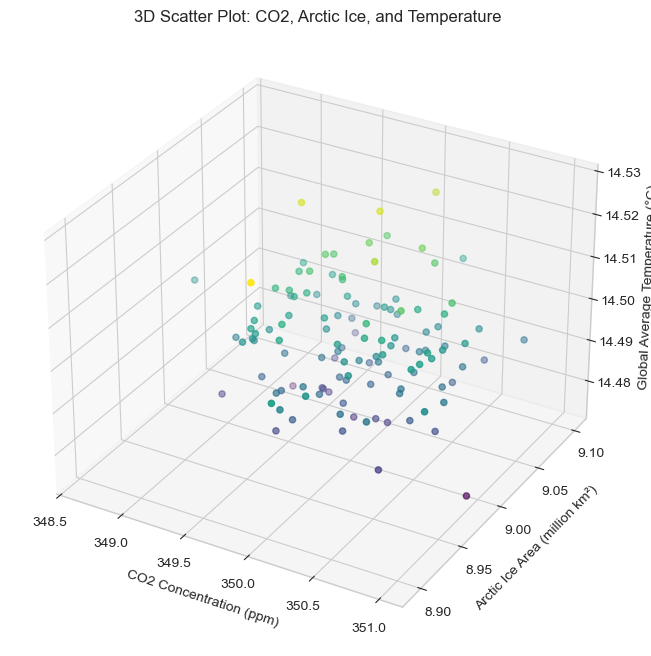

3D Visualization: Sea Level Rise  vs Arctic Ice vs Temperature


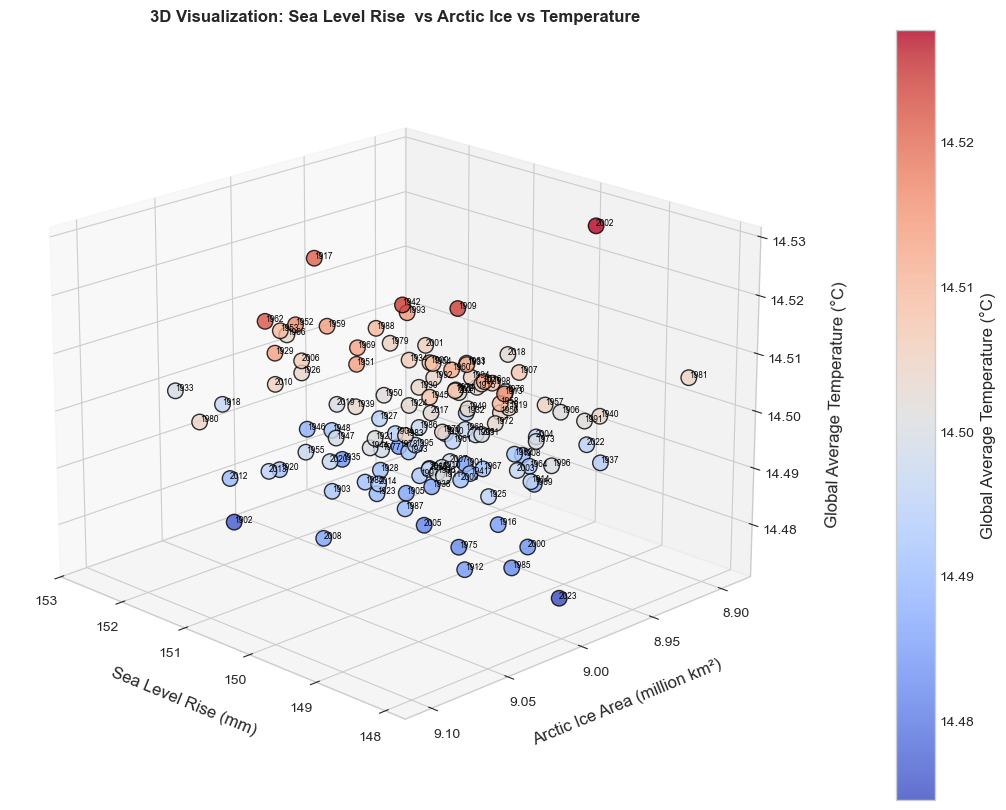

In [11]:
# Pair plot for all variables
sns.pairplot(yearly_data[[avg_temperature, co2_concentration, sea_level_rise, arctic_ice_area]])
plt.suptitle('Pair Plot of Climate Variables', y=1.02)
plt.show()
# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    yearly_data[co2_concentration],
    yearly_data[arctic_ice_area],
    yearly_data[avg_temperature],
    c=yearly_data[avg_temperature],
    cmap='viridis'
)
ax.set_xlabel(co2_concentration)
ax.set_ylabel(arctic_ice_area)
ax.set_zlabel(avg_temperature)
plt.title('3D Scatter Plot: CO2, Arctic Ice, and Temperature')
plt.show()
# 3d plot
print("3D Visualization: Sea Level Rise  vs Arctic Ice vs Temperature")
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
#defining variable
x = yearly_data[sea_level_rise]
y = yearly_data[arctic_ice_area]
z = yearly_data[avg_temperature]
#create scatter plot with color mapping
sc = ax.scatter(x, y, z,c=z, cmap='coolwarm', marker =".", s=500, edgecolor='k', alpha=0.8)

# add color bar for temperature gradient

cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label(avg_temperature, fontsize=12)


#Gird and view angle
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
ax.view_init(elev=20, azim=135) #adjusitn the view angle

#Labels and title
ax.set_xlabel(sea_level_rise, fontsize=12, labelpad=12)
ax.set_ylabel(arctic_ice_area, fontsize=12, labelpad=12)
ax.set_zlabel(avg_temperature, fontsize=12, labelpad=12)
ax.set_title("3D Visualization: Sea Level Rise  vs Arctic Ice vs Temperature", fontsize=12, fontweight='bold')

# Annotate points with years
for i in range(len(yearly_data)):
    ax.text(x[i], y[i], z[i], f"{yearly_data['Year'][i]}", fontsize=6, color='black')
plt.show()

Andrew Curve Analysis
        Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0    0.00000                         0.603422                 0.733216   
1    0.00813                         0.202688                 0.472202   
2    0.01626                         0.032007                 0.278452   
3    0.02439                         0.334585                 0.424442   
4    0.03252                         0.369933                 0.378977   
..       ...                              ...                      ...   
119  0.96748                         0.480166                 0.000000   
120  0.97561                         0.420621                 0.584268   
121  0.98374                         0.504947                 0.638723   
122  0.99187                         0.388580                 0.783879   
123  1.00000                         0.000000                 1.000000   

     Sea Level Rise (mm)  Arctic Ice Area (million km²)    Decade  
0               0.510

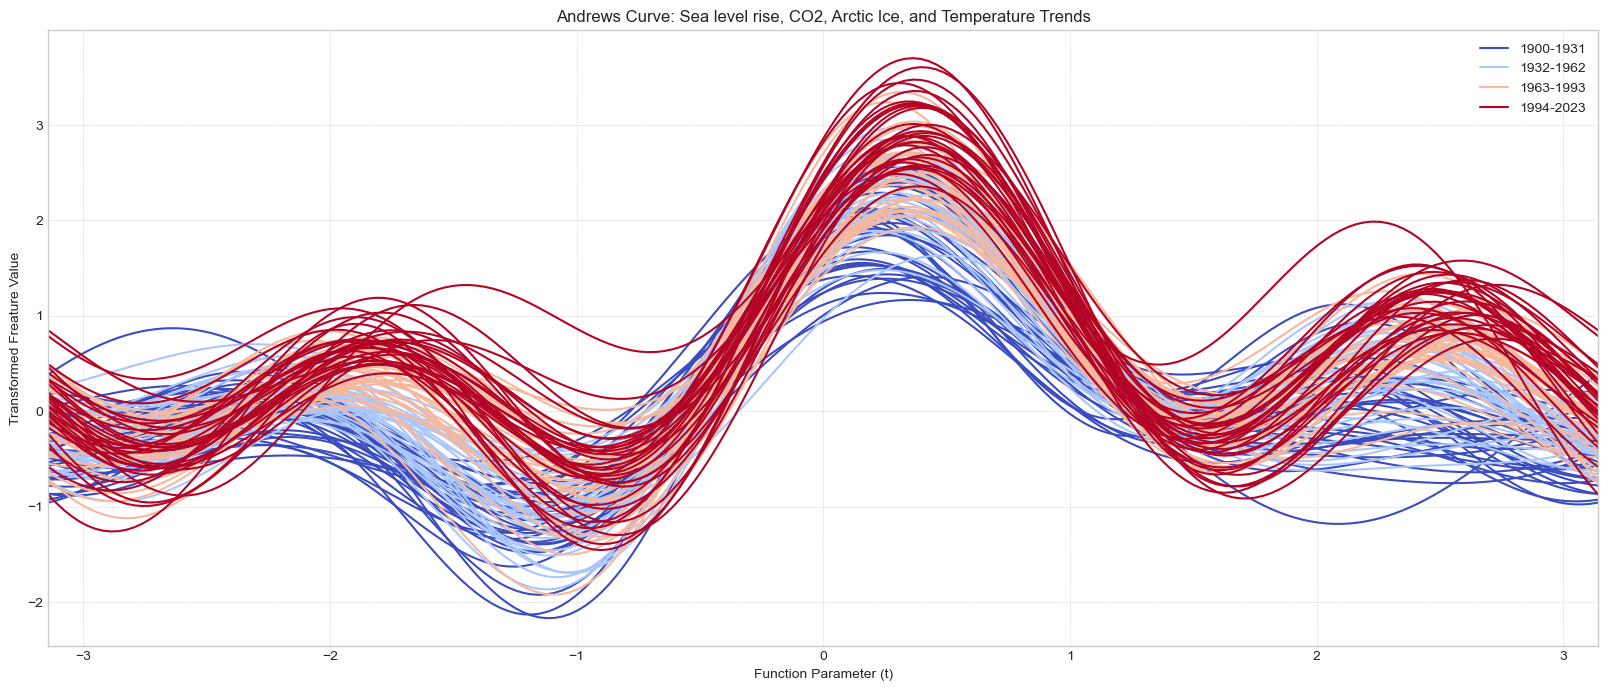

In [12]:
from pandas.plotting import andrews_curves
print("Andrew Curve Analysis")
#Normalizing data for better visualization
yearly_data_scaled = (yearly_data - yearly_data.min())/(yearly_data.max() - yearly_data.min())
print(yearly_data_scaled)

# Add categorical column for visualization
yearly_data_scaled["Year Group"] = pd.cut(yearly_data["Year"], bins=4, labels = ["1900-1931", "1932-1962", "1963-1993","1994-2023"])
#print(yearly_data_scaled)

# Plotting andrews curves
plt.figure(figsize=(20,8))
andrews_curves(yearly_data_scaled, "Year Group", colormap = "coolwarm")
plt.title("Andrews Curve: Sea level rise, CO2, Arctic Ice, and Temperature Trends")
plt.xlabel("Function Parameter (t)")
plt.ylabel("Transformed Freature Value")
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.show()

In [37]:
# import matplotlib.animation as animation

In [43]:
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Function to update the plot for each frame
# def update(frame):
#     ax.clear()
#     ax.scatter(df['CO2 Concentration (ppm)'][:frame], df['Global Average Temperature (°C)'][:frame], df['Sea Level Rise (mm)'][:frame], c=df['Arctic Ice Area (million km²)'][:frame], cmap='viridis')
#     ax.set_xlabel('CO2 Concentration (ppm)')
#     ax.set_ylabel('Global Average Temperature (°C)')
#     ax.set_zlabel('Sea Level Rise (mm)')
#     ax.set_title(f'Year: {df["Year"][frame]}')

# # Create the animation
# ani = animation.FuncAnimation(fig, update, frames=len(df), interval=100)

# plt.show()
    

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

Our analysis of the climate dataset spanning 1900 to 2023 reveals some intriguing findings. At first glance, the individual climate variables—global temperature, CO₂ concentration, sea level rise, and Arctic ice area—appear remarkably stable over time. For example, global temperatures hover around 14.5°C with only minor yearly fluctuations, CO₂ levels stay near 350 ppm, sea levels range narrowly between 149 and 151 mm, and Arctic ice area shows only small changes. Line plots reinforce this stability, showing no clear long-term trends or significant shifts in any of these variables.

However, when examining relationships between variables, the picture becomes more complex. The bivariate analysis uncovers weak and sometimes unexpected correlations. For instance, there’s a slight negative correlation between temperature and CO₂ concentration, which contradicts common expectations. Similarly, sea level rise and Arctic ice area show a weak positive correlation. These results suggest that simple linear models may not fully capture the intricate dynamics at play.

The multivariate analysis further supports this complexity. Visualizations like 3D scatter plots and heatmaps reveal no strong patterns or significant relationships among the variables. This suggests that other factors or non-linear interactions might be influencing these climate metrics in ways not evident in the dataset.

In summary, while the data shows stability in individual climate variables over time, the weak and counterintuitive relationships between them highlight gaps in understanding. Advanced analytical methods may be needed to uncover deeper insights into how these factors interact. This analysis underscores the importance of cautious interpretation and further research before drawing conclusions about long-term climate trends based solely on this dataset.

# TODO: Write your conclusions here